In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

### Exploratory Data Analysis

In [3]:
# Read data
df = pd.read_csv("data/data.csv")
df.head()
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# No of features and no of records
print(df.shape)
# All features and data types
print(df.dtypes)

(21613, 21)
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

0  /  21
0  /  21613


The data is pretty much structured with no NANs.

### Feature Selection

In [6]:
# Drop id column, we don't need that
df.drop(columns=["id"], axis=1, inplace=True)
# Keep only year in date column
df["date"] = df["date"].replace(to_replace="(2014|2015)(.*)", value='\\1', regex=True)
df["date"] = pd.to_numeric(df["date"], errors='coerce')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# Calculate correlations between features and target variable
features = df.iloc[:,3:].columns.tolist()
features.append("date")
target = df.iloc[:,1].name

correlations = {}
for f in features:
    x1 = df[f].values
    x2 = df[target].values
    key = f + ' vs ' + target
    correlations[key] = spearmanr(x1,x2)[0]
    
df_correlations = pd.DataFrame(correlations, index=['Value']).T
df_correlations.loc[df_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
grade vs price,0.658215
sqft_living vs price,0.644191
sqft_living15 vs price,0.572290
sqft_above vs price,0.541752
bathrooms vs price,0.497160
lat vs price,0.456409
floors vs price,0.322347
view vs price,0.293931
sqft_basement vs price,0.251704
waterfront vs price,0.115089


We can see that sqft_living is most importatnt and date is the least important feature for predicting house price. So, we can ignore zipcode and date, their spearmanr value is very low.

#### Let's analyse the dependencies through graph....
#### Continuous Features
sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15

/home/rahul/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


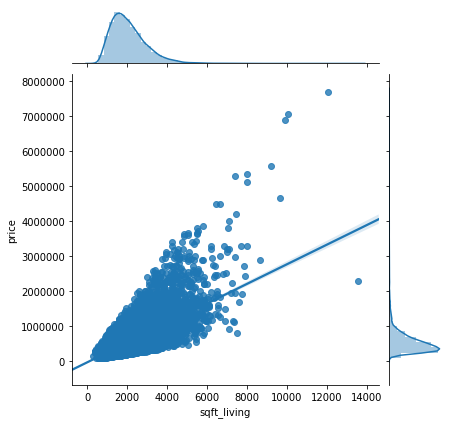

In [8]:
# Plot sqft_living vs price
sns.jointplot(x="sqft_living", y="price", data=df, kind = 'reg')

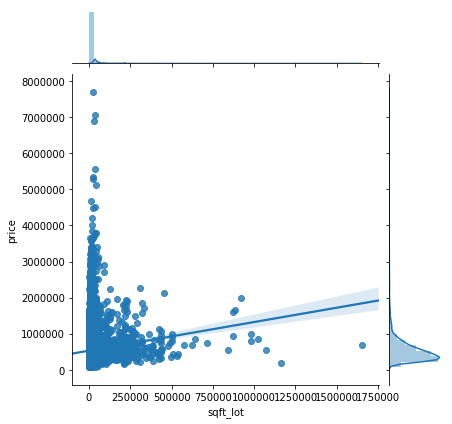

In [9]:
# Plot sqft_lot vs price
sns.jointplot(x="sqft_lot", y="price", data=df, kind = 'reg')

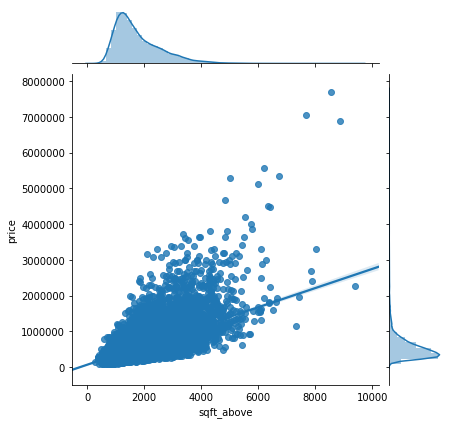

In [10]:
# Plot sqft_above vs price
sns.jointplot(x="sqft_above", y="price", data=df, kind = 'reg')

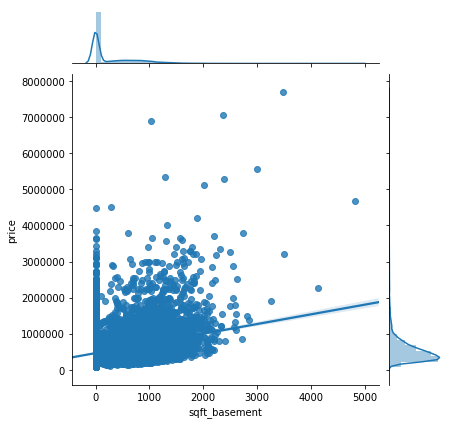

In [11]:
# Plot sqft_basement vs price
sns.jointplot(x="sqft_basement", y="price", data=df, kind = 'reg')

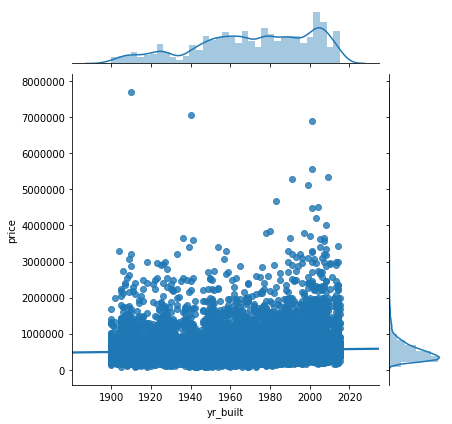

In [12]:
# Plot yr_built vs price
sns.jointplot(x="yr_built", y="price", data=df, kind = 'reg')

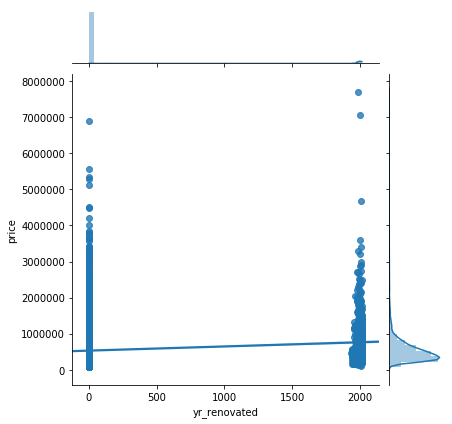

In [13]:
# Plot yr_renovated vs price
sns.jointplot(x="yr_renovated", y="price", data=df, kind = 'reg')

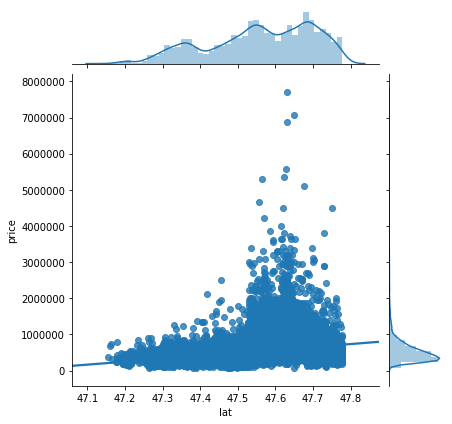

In [14]:
# Plot lat vs price
sns.jointplot(x="lat", y="price", data=df, kind = 'reg')

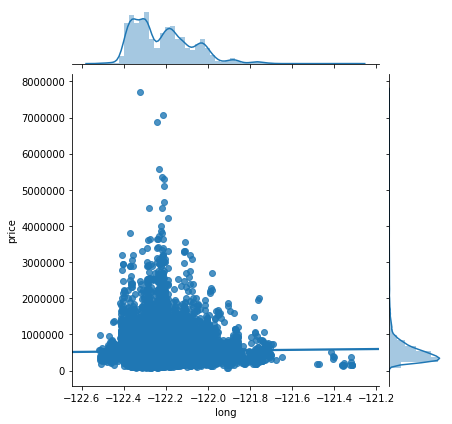

In [15]:
# Plot long vs price
sns.jointplot(x="long", y="price", data=df, kind = 'reg')

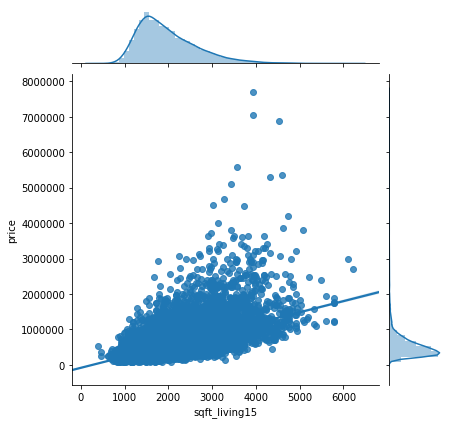

In [16]:
# Plot sqft_living15 vs price
sns.jointplot(x="sqft_living15", y="price", data=df, kind = 'reg')

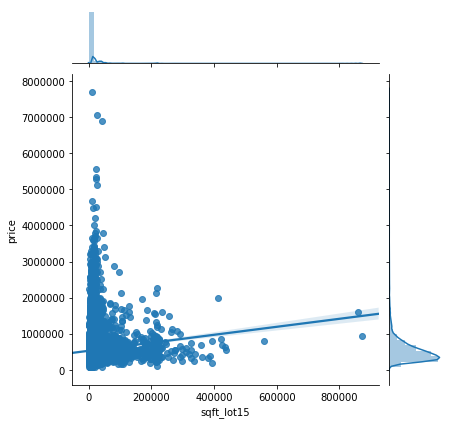

In [17]:
# Plot sqft_lot15 vs price
sns.jointplot(x="sqft_lot15", y="price", data=df, kind = 'reg')

We can see that yr_built is poorly related to price, so we will ignore it. On analyzing, yr_renovated acn be used as a categorial feature ie, is_renovated or not. So lets do that....

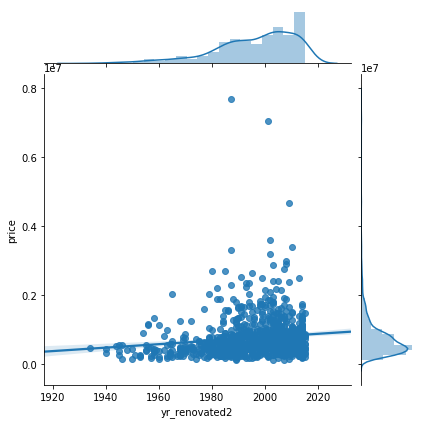

In [18]:
# Plot yr_renovated2 vs price
# Let's first check, if indeed, yr_renovated related to price
df['yr_renovated2'] = df['yr_renovated'].apply(lambda x: x if x > 0 else None)
sns.jointplot(x="yr_renovated2", y="price", data=df, kind = 'reg', dropna=True)

In [19]:
# Create a categorial feature using yr_renovated
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

#### Categorial Features
bedrooms, bathrooms, floors, waterfront, view, condition, grade

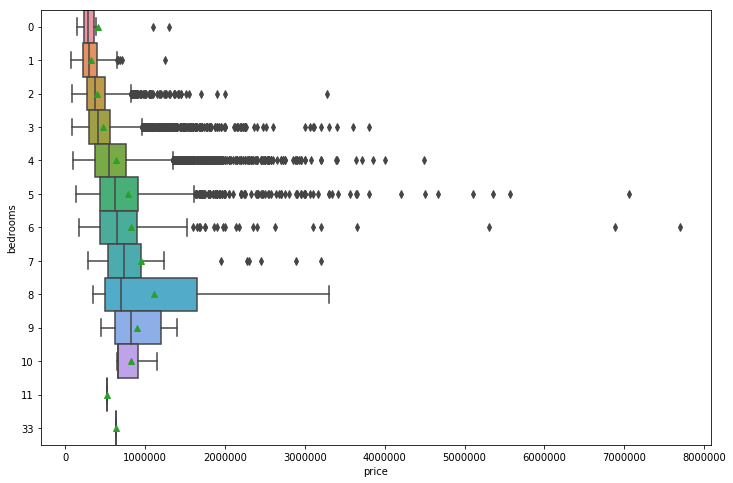

In [30]:
# Plot bedrooms vs price
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = 'bedrooms', x = 'price', data = df, width = 1, orient = 'h', showmeans = True, fliersize = 5, ax=ax)

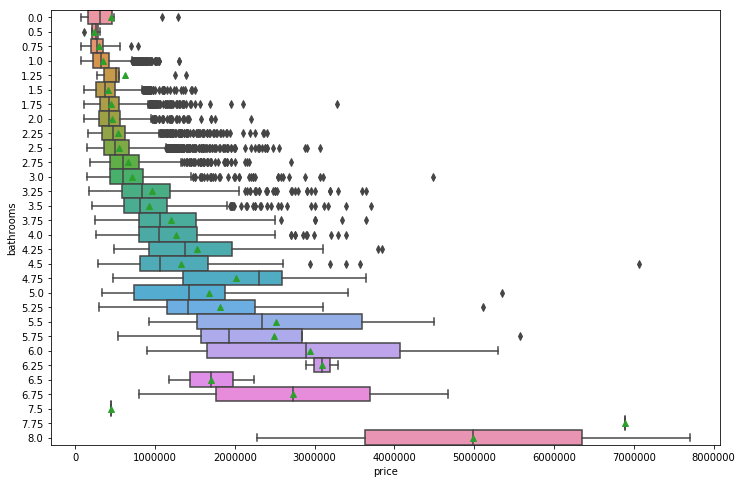

In [33]:
# Plot bathrooms vs price
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = 'bathrooms', x = 'price', data = df, width = 1, orient = 'h', showmeans = True, fliersize = 5, ax=ax)

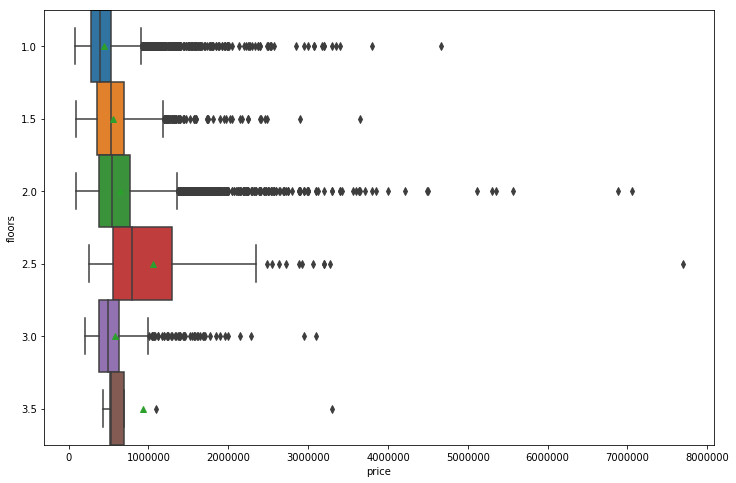

In [34]:
# Plot floors vs price
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = 'floors', x = 'price', data = df, width = 1, orient = 'h', showmeans = True, fliersize = 5, ax=ax)

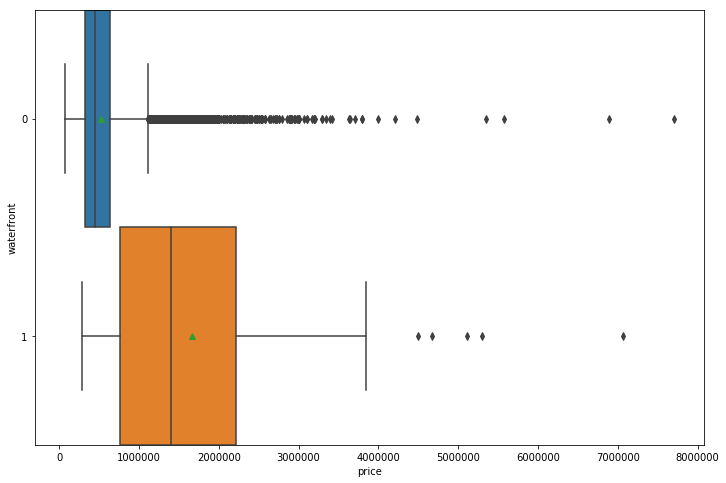

In [35]:
# Plot waterfront vs price
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = 'waterfront', x = 'price', data = df, width = 1, orient = 'h', showmeans = True, fliersize = 5, ax=ax)

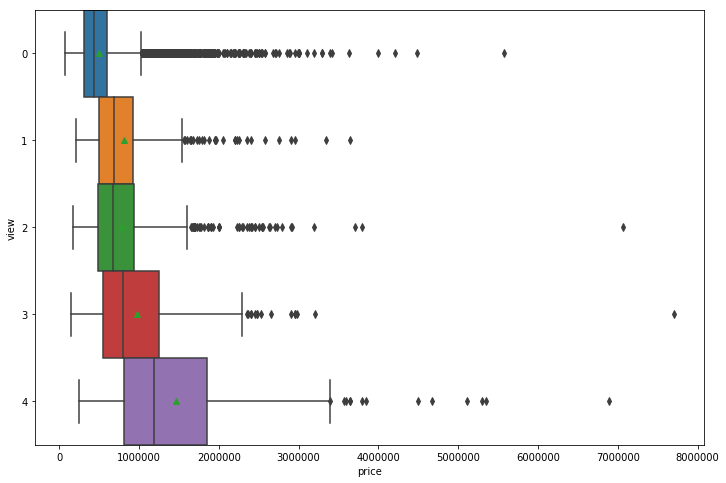

In [36]:
# Plot view vs price
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = 'view', x = 'price', data = df, width = 1, orient = 'h', showmeans = True, fliersize = 5, ax=ax)

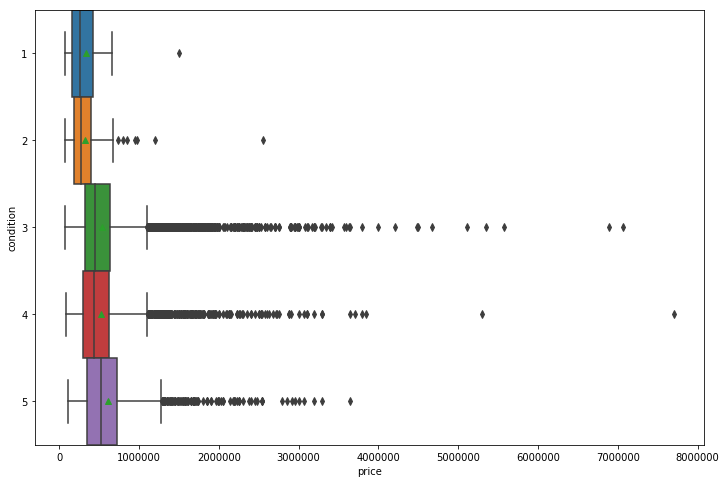

In [37]:
# Plot condition vs price
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = 'condition', x = 'price', data = df, width = 1, orient = 'h', showmeans = True, fliersize = 5, ax=ax)

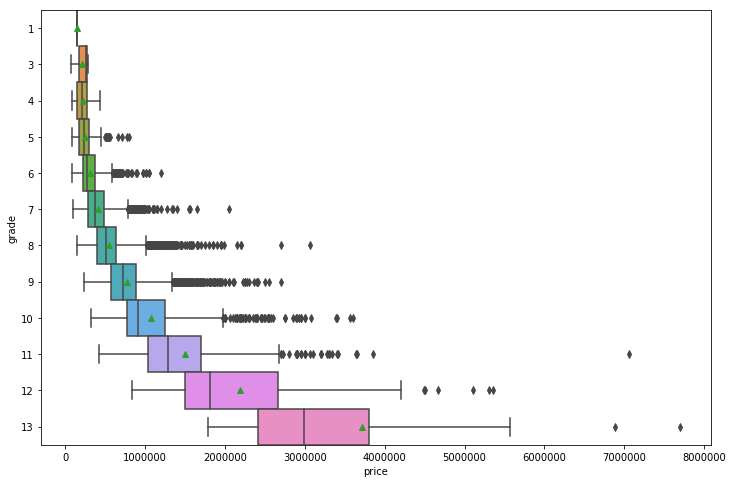

In [38]:
# Plot grade vs price
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y = 'grade', x = 'price', data = df, width = 1, orient = 'h', showmeans = True, fliersize = 5, ax=ax)

Of all the categorial features, condition is least related to price. We are going to ignore it.